In [7]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


import h5py
#from read_raw import load_from_file
import maxlab_analysis as mla

import time
from scipy.signal import find_peaks
import scipy.stats as stats
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN


In [3]:
X_pca = np.load('batch2_20439div15_pca.npy')

t = np.linspace(0, np.shape(X_pca)[0] * (1/1250), np.shape(X_pca)[0])

[[-14.390252     0.72411627  -1.9431435 ]
 [-11.679002     0.9344515   -1.7646621 ]
 [-12.691956     0.74678046  -2.2894793 ]
 ...
 [  8.015747    -0.46011952  -0.7790353 ]
 [  5.847804    -0.26288423  -1.7838814 ]
 [  8.487079    -0.34301892  -1.5949249 ]]
[0.00000000e+00 8.00001067e-04 1.60000213e-03 ... 6.00078400e+02
 6.00079200e+02 6.00080000e+02]


In [8]:
kmeans_labels = KMeans(n_clusters = 2).fit_predict(X_pca)
dbscan_labels = DBSCAN(eps = 10, min_samples = 100).fit_predict(X_pca)
print(max(dbscan_labels))

c:\Users\mrwun\anaconda3\envs\maxlab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MemoryError: bad allocation

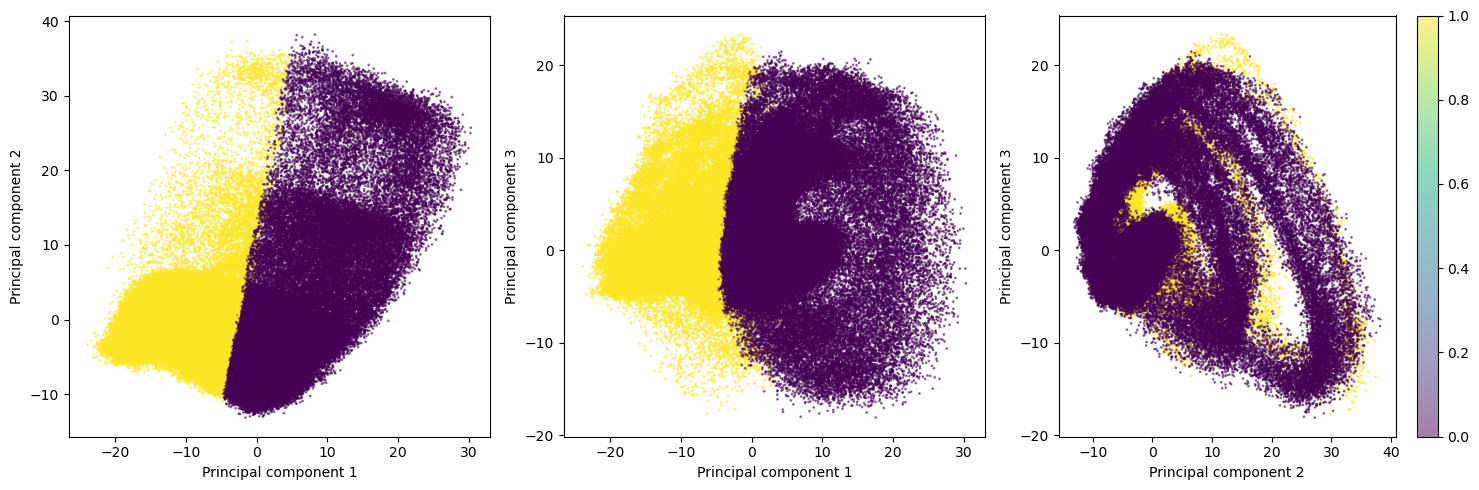

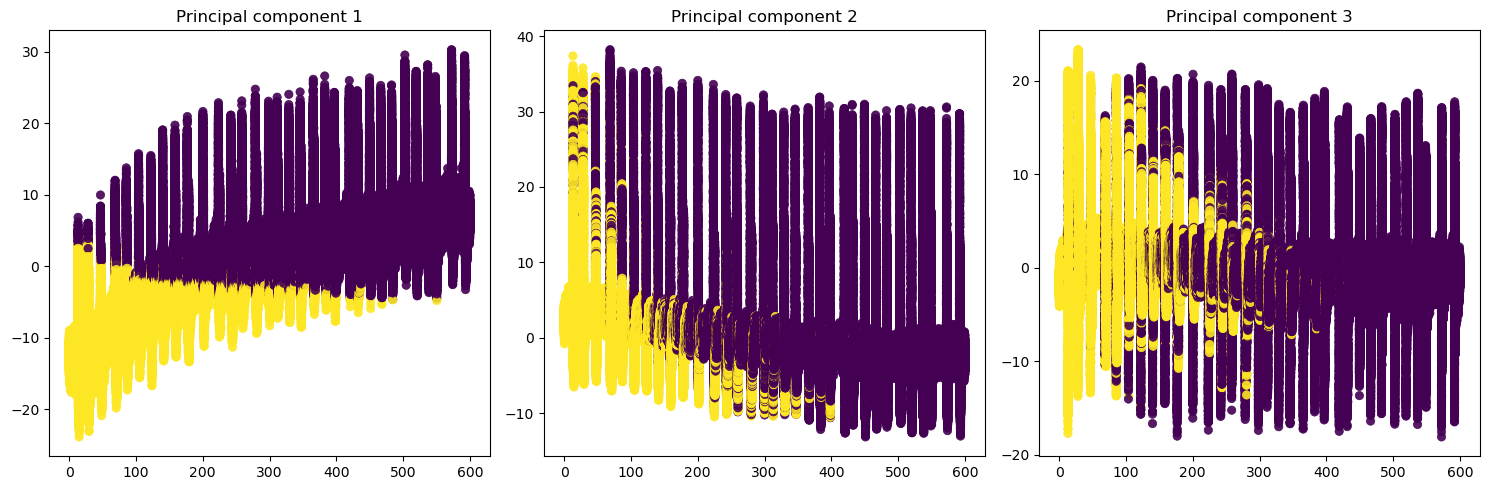

In [6]:
%matplotlib inline
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_pca[::5, 0], X_pca[::5, 1],  s = 1, c = kmeans_labels[::5], alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(132)

plt.scatter(X_pca[::5, 0], X_pca[::5, 2],  s = 1, c = kmeans_labels[::5], alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')

plt.subplot(133)
plt.scatter(X_pca[::5, 1], X_pca[::5, 2],  s = 1, c = kmeans_labels[::5], alpha = 0.5)
plt.colorbar()
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.tight_layout()
plt.show()

n_components = np.shape(X_pca)[1]
fig_width = 3
plt.figure(figsize = (fig_width * 5, (int(np.ceil(n_components/fig_width)) * 5)))
for i in np.arange(1, n_components + 1):
    plt.subplot(int(np.ceil(n_components/fig_width)), fig_width, i)
    plt.scatter(t[::5], X_pca[::5, i-1], c = kmeans_labels[::5], linewidth = 0.5, s = 1, alpha = 0.5)
    plt.title('Principal component ' + str(i))
plt.tight_layout()
plt.show()